In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [13]:
data = pd.read_csv('worldcupallgoals.csv',encoding='latin1')
#rimuovo tutte le righe con valori nulli
data.dropna(inplace=True)

# Funzione per formattare il nome
def format_name(row):
    name = row['given_name'] if row['given_name'].lower() != 'not applicable' else ''
    surname = row['family_name'] if row['family_name'].lower() != 'not applicable' else ''
    full_name = f"{name} {surname}".strip() #Concatena i nomi e rimuove spazi all'inizio e alla fine
    return full_name

data['Player'] = data.apply(format_name, axis=1)
data['year'] = data['tournament_name'].str.extract(r'(\d{4})').astype(int)

## Top 20 Goal Scorers in FIFA World Cup History

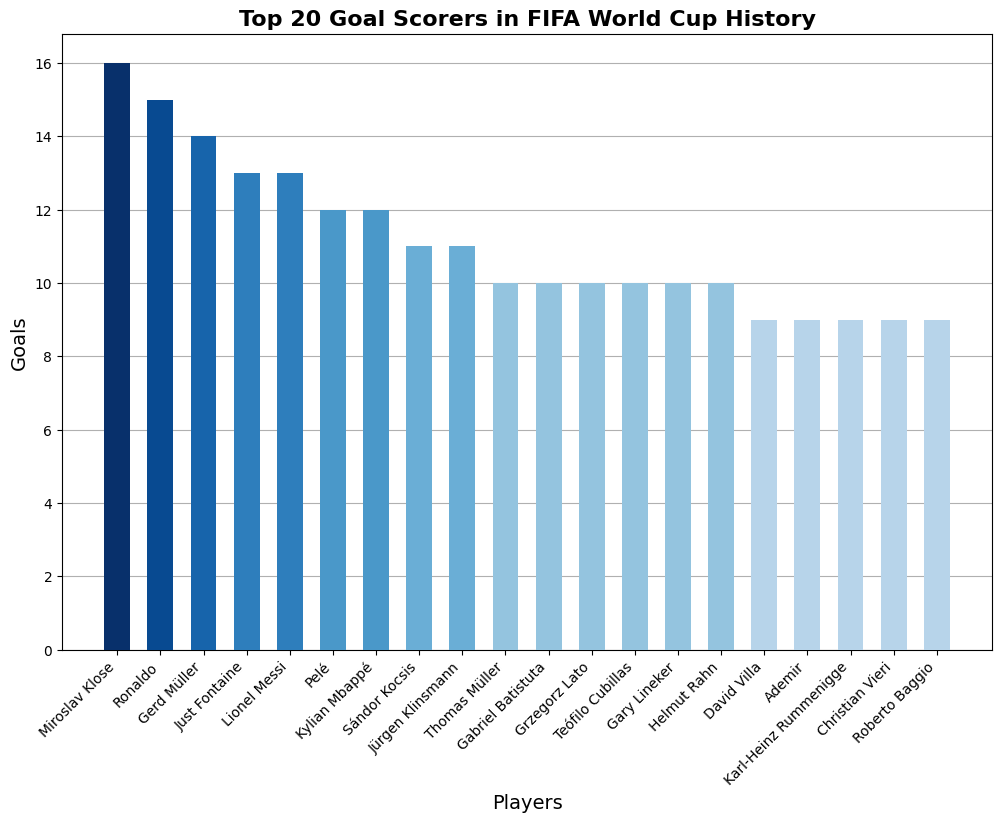

In [14]:
# Creiamo un dataframe con i goal per giocatore
top_scorers = data['Player'].value_counts().head(20).reset_index()
top_scorers.columns = ['Player', 'Goals']

# Mappa di colori a scala di blu
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_blues", plt.cm.Blues(np.linspace(0.3, 1.0, 256))
)
norm = plt.Normalize(top_scorers['Goals'].min(), top_scorers['Goals'].max())
colors = custom_cmap(norm(top_scorers['Goals']))

# Estrai nomi e valori
players = top_scorers['Player']
goals = top_scorers['Goals']

plt.figure(figsize=(12, 8))
plt.grid(axis="y", zorder=0)
plt.bar(players, goals, color=colors, width=0.6, zorder=3)
# Titolo e assi
plt.title('Top 20 Goal Scorers in FIFA World Cup History', fontsize=16, weight='bold')
plt.ylabel('Goals', fontsize=14)
plt.xlabel('Players', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

## Top 15 Players with at Least One Goal in Different Editions of the FIFA World Cup

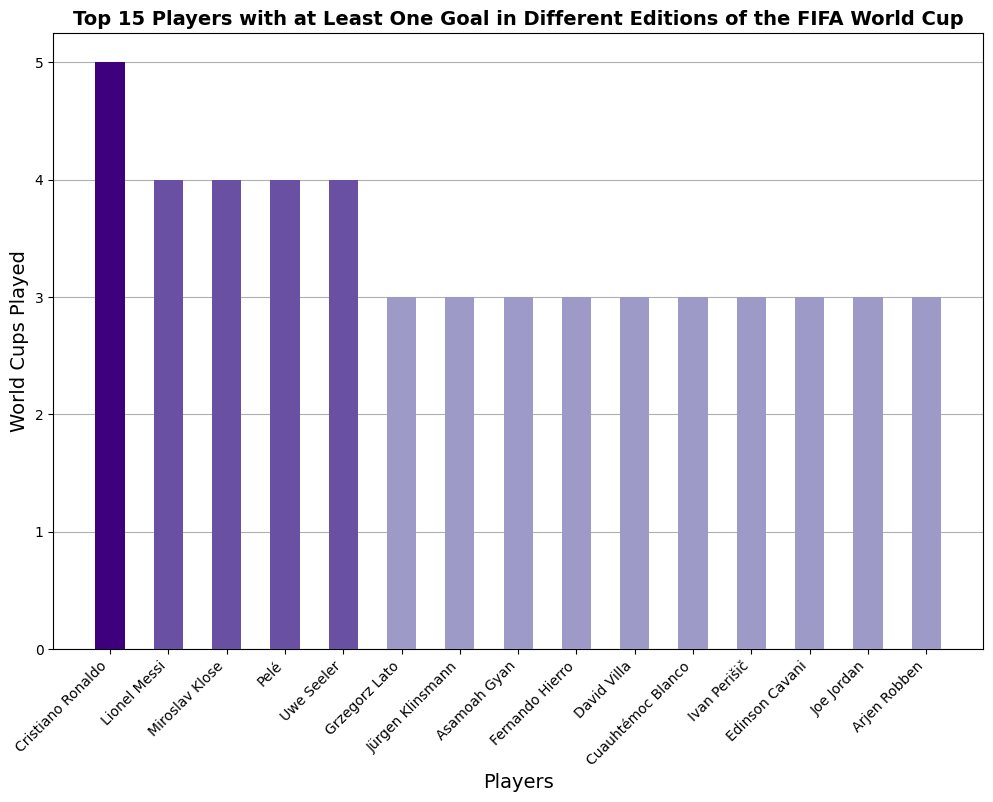

In [17]:
# Conta le partecipazioni uniche per ogni giocatore
participation_counts = data.groupby('Player')['year'].nunique().reset_index()
participation_counts = participation_counts.rename(columns={'year': 'WorldCups'})

top_participants = participation_counts.sort_values(by='WorldCups', ascending=False).head(15)

# Crea una mappa di colori a scala di viola
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_purples", plt.cm.Purples(np.linspace(0.5, 1.0, 256))
)
norm = plt.Normalize(top_participants['WorldCups'].min(), top_participants['WorldCups'].max())
colors = custom_cmap(norm(top_participants['WorldCups']))

players = top_participants['Player']
worldcups = top_participants['WorldCups']
plt.figure(figsize=(12, 8))
plt.grid(axis="y", zorder=0)
plt.bar(players,worldcups,color=colors,width=0.5,zorder=3)
# Titolo e assi
plt.title('Top 15 Players with at Least One Goal in Different Editions of the FIFA World Cup', fontsize=14, weight='bold')
plt.ylabel('World Cups Played', fontsize=14)
plt.xlabel('Players', fontsize=14)
# Etichette asse x
labels = [
    'Ivan Perišič' if 'Ivan Peri' in name else name  # Per gestire correttamente la codifica del cognome
    for name in top_participants['Player']
]
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.show()